# Analysis

1. There is a relatively strong correlation bewteen latitude and temperature. The lower 
   latitudes have higher temperatures and the higher latitudes have lower temperatures.
2. The correlation between humidity and latitude is very weak.
3. There is almost no correlation between cloudiness and latitude.
4. The correlation between latitude and wind speed is very weak.
5. Although my sample was random there was a bias toward cities in the northern 
   hemisphere. Most of the cities in my sample were located in Europe.

In [8]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from citipy import citipy
import random
import csv
import requests
import time

import config

In [2]:
api_key = config.api_key

In [3]:
#Import CSV file, and read into DataFrame.

world_data = pd.read_csv("resources/worldcities.csv")

#Preview the data.
world_data.head()

Country              City   Latitude  Longitude
0      ad  andorra la vella  42.500000   1.516667
1      ad           canillo  42.566667   1.600000
2      ad            encamp  42.533333   1.583333
3      ad        la massana  42.550000   1.516667
4      ad      les escaldes  42.500000   1.533333

In [4]:
# Randomly select 500 cities for weather data.

selected_cities = world_data.sample(n=500)

#Visualize the selected cities DataFrame.

selected_cities

Country                City   Latitude   Longitude
43104      us       north decatur  33.790278  -84.306111
8490       de         bad doberan  54.100000   11.900000
1822       be            wetteren  51.000000    3.883333
42176      us      siloam springs  36.188056  -94.540278
43099      us              monroe  33.794722  -83.713333
30471      ph              tibiao  11.291515  122.035407
25623      nl               neede  52.135118    6.611966
20572      it             maniago  46.170556   12.707778
12861      gb          portgordon  57.650000   -3.016667
1543       be             hensies  50.433333    3.666667
17085      in             banapur  19.783333   85.183333
2056       bg        simeonovgrad  42.033333   25.833333
22238      kz           zhitikara  52.190833   61.200556
12107      fr            toulouse  43.599516    1.433188
30818      pk              kamoke  31.974444   74.224444
16659      ie           kilcullen  53.130278   -6.744444
30356      ph            talaibon  13.837800  121.139800
27911      ph              claver   9.574900  125.730700
46327      ve            el tigre   8.892500  -64.252778
28282      ph          hilotongan  11.144000  123.642600
45006      us            columbus  39.961111  -82.998889
13847      gr        lianoveryion  40.637778   22.503056
15884      hu             ostoros  47.866667   20.433333
36829      ru           lisiy nos  60.016856   30.020082
17616      in           dondaicha  21.333333   74.566667
14606      gt  san jose del golfo  14.762778  -90.376389
3311       br             manaira  -7.700000  -38.166667
46023      us            mukilteo  47.944722 -122.303333
35111      ru       aleksandrovsk  59.158043   57.562414
29210      ph          namboongan  16.303300  120.375800
...       ...                 ...        ...         ...
43795      us         mays chapel  39.433056  -76.649722
22376      lt              jonava  55.083333   24.283333
3151       br              ituacu -13.816667  -41.300000
28290      ph         hingatungan  10.584000  125.185200
14487      gt          guazacapan  14.074167  -90.416667
45918      us             hampton  37.029722  -76.345556
31616      pt               godim  41.171037   -7.803033
35624      ru     chernyshkovskiy  48.421875   42.230825
12248      gb             annbank  55.466667   -4.516667
26725      pe             pacanga  -7.166667  -79.500000
30825      pk             kashmor  28.433333   69.583333
32946      ro  draganesti de vede  44.133333   25.050000
43313      us              marion  37.730556  -88.933056
2434       br           barcarena  -1.500000  -48.666667
41354      ua              kirove  47.653107   35.695120
15867      hu              ocseny  46.313697   18.757493
24849      mx         villachuato  20.166667 -101.583333
37915      ru          rtishchevo  52.260412   43.787450
3265       br  laranjeiras do sul -25.416667  -52.416667
35734      ru            donskoye  52.774946   41.477586
44727      us      east northport  40.876667  -73.325000
20003      ir           tonekabon  36.816259   50.873763
27457      ph           binubusan  13.962826  120.637713
45978      us              burien  47.470556 -122.345556
24858      mx        villa juarez  22.116667 -102.066667
17510      in               datia  25.666667   78.466667
38177      ru                 sim  54.993000   57.698200
10219      dm           coulihaut  15.483333  -61.483333
4078       br            sorocaba -23.483333  -47.450000
38297      ru          sovkhoznyy  56.559900   61.426000

[500 rows x 4 columns]

In [5]:
#Counter

row_count = 0

# Create blank columns for the necessary fields.

selected_cities["Temperature"] = ""
selected_cities["Humidity"] = ""
selected_cities["Cloudiness"] = ""
selected_cities["Wind Speed"] = ""

# Loop through and get the weather data using the Open Weather API.

for index, row in selected_cities.iterrows():
    #Sleep to help with the call limit
    
    time.sleep(1)
    
    #Open weather url.
    
    url = "https://api.openweathermap.org/data/2.5/weather?"
    units = "Imperial"
    
    query_url = url + "lat="+ str(row["Latitude"]) + "&lon=" + str(row["Longitude"]) + "&appid=" + api_key + "&units=" + units
    #Print log to ensure the loop is working correctly.
    
    print("Now retieving city # " + str(row_count))
    print(query_url)
    row_count += 1
    
    #Run requests to grab the JSON at the requested URL
    
    city_weather = requests.get(query_url).json()
    
    
    #print(row["Latitude"],row["Longitude"])
#print(city_weather.keys())
    
    #Append the weather data to the appropriate columns.
    #Use try/except to skip any cities with errors.
    #selected_cities.append(requests.get(query_url + str(city_weather)).json())
    try:
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        
        selected_cities.set_value(index, "Temperature", temperature)
        selected_cities.set_value(index,"Humidity", humidity)
        selected_cities.set_value(index,"Cloudiness", cloudiness)
        selected_cities.set_value(index,"Wind Speed", wind_speed)
    except:
        print("Error with weather data, skipping.")
        #continue
selected_cities  

Now retieving city # 0
https://api.openweathermap.org/data/2.5/weather?lat=33.7902778&lon=-84.3061111&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 1
https://api.openweathermap.org/data/2.5/weather?lat=54.1&lon=11.9&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 2
https://api.openweathermap.org/data/2.5/weather?lat=51.0&lon=3.8833330000000004&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 3
https://api.openweathermap.org/data/2.5/weather?lat=36.188055600000006&lon=-94.5402778&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 4
https://api.openweathermap.org/data/2.5/weather?lat=33.7947222&lon=-83.7133333&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 5
https://api.openweathermap.org/data/2.5/weather?lat=11.291514999999999&lon=122.035407&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 6
https://api.openweathermap.org/data/2.

Now retieving city # 52
https://api.openweathermap.org/data/2.5/weather?lat=46.5&lon=27.516666999999998&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 53
https://api.openweathermap.org/data/2.5/weather?lat=37.9833333&lon=23.8166667&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 54
https://api.openweathermap.org/data/2.5/weather?lat=-8.7&lon=34.3833333&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 55
https://api.openweathermap.org/data/2.5/weather?lat=55.85&lon=-2.1333330000000004&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 56
https://api.openweathermap.org/data/2.5/weather?lat=42.611745&lon=-5.616708999999999&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 57
https://api.openweathermap.org/data/2.5/weather?lat=45.43&lon=12.119722&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 58
https://api.openweathermap.org/data/2.5

Now retieving city # 105
https://api.openweathermap.org/data/2.5/weather?lat=-26.166667&lon=-56.466667&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 106
https://api.openweathermap.org/data/2.5/weather?lat=-31.629484&lon=-60.701036&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 107
https://api.openweathermap.org/data/2.5/weather?lat=34.55&lon=135.8&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 108
https://api.openweathermap.org/data/2.5/weather?lat=12.65&lon=-4.4166667&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 109
https://api.openweathermap.org/data/2.5/weather?lat=54.8056&lon=82.5989&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 110
https://api.openweathermap.org/data/2.5/weather?lat=9.303472&lon=-74.56477&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 111
https://api.openweathermap.org/data/2.5/weather?lat=35.95

Now retieving city # 158
https://api.openweathermap.org/data/2.5/weather?lat=12.988889&lon=123.95&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 159
https://api.openweathermap.org/data/2.5/weather?lat=57.0761&lon=86.2313&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 160
https://api.openweathermap.org/data/2.5/weather?lat=59.583332999999996&lon=8.0&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 161
https://api.openweathermap.org/data/2.5/weather?lat=47.272346999999996&lon=35.222352&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 162
https://api.openweathermap.org/data/2.5/weather?lat=55.839465000000004&lon=12.544316&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 163
https://api.openweathermap.org/data/2.5/weather?lat=40.0252778&lon=44.5908333&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 164
https://api.openweathermap.or

Now retieving city # 211
https://api.openweathermap.org/data/2.5/weather?lat=39.95&lon=25.216666699999998&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 212
https://api.openweathermap.org/data/2.5/weather?lat=16.266667&lon=-92.266667&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 213
https://api.openweathermap.org/data/2.5/weather?lat=51.073611&lon=132.564167&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 214
https://api.openweathermap.org/data/2.5/weather?lat=38.7375&lon=-104.7883333&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 215
https://api.openweathermap.org/data/2.5/weather?lat=56.1497&lon=101.6085&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 216
https://api.openweathermap.org/data/2.5/weather?lat=46.873090000000005&lon=7.568647&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 217
https://api.openweathermap.org/d

Now retieving city # 263
https://api.openweathermap.org/data/2.5/weather?lat=47.182126000000004&lon=8.463576&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 264
https://api.openweathermap.org/data/2.5/weather?lat=52.583332999999996&lon=-1.1&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 265
https://api.openweathermap.org/data/2.5/weather?lat=40.950653&lon=-5.627226&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 266
https://api.openweathermap.org/data/2.5/weather?lat=53.32220600000001&lon=6.8487800000000005&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 267
https://api.openweathermap.org/data/2.5/weather?lat=41.9833333&lon=27.5333333&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 268
https://api.openweathermap.org/data/2.5/weather?lat=37.405983&lon=-1.5853&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 269
https://api.open

Now retieving city # 315
https://api.openweathermap.org/data/2.5/weather?lat=15.0&lon=-91.616667&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 316
https://api.openweathermap.org/data/2.5/weather?lat=7.555556&lon=125.72666699999999&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 317
https://api.openweathermap.org/data/2.5/weather?lat=53.733332999999995&lon=-1.583333&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 318
https://api.openweathermap.org/data/2.5/weather?lat=49.514288&lon=17.058101&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 319
https://api.openweathermap.org/data/2.5/weather?lat=10.079549&lon=124.343244&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 320
https://api.openweathermap.org/data/2.5/weather?lat=19.55&lon=-71.7&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 321
https://api.openweathermap.org/data/2.5

Now retieving city # 367
https://api.openweathermap.org/data/2.5/weather?lat=57.05&lon=22.5833333&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 368
https://api.openweathermap.org/data/2.5/weather?lat=35.283333299999995&lon=24.8833333&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 369
https://api.openweathermap.org/data/2.5/weather?lat=46.507778&lon=28.054721999999998&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 370
https://api.openweathermap.org/data/2.5/weather?lat=10.1603&lon=122.8615&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 371
https://api.openweathermap.org/data/2.5/weather?lat=42.025555600000004&lon=-88.17833329999999&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 372
https://api.openweathermap.org/data/2.5/weather?lat=14.7833333&lon=-60.9833333&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 373
https://api

Now retieving city # 419
https://api.openweathermap.org/data/2.5/weather?lat=44.456111&lon=20.073889&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 420
https://api.openweathermap.org/data/2.5/weather?lat=13.692336&lon=99.849692&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 421
https://api.openweathermap.org/data/2.5/weather?lat=-34.3166667&lon=-57.216666700000005&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 422
https://api.openweathermap.org/data/2.5/weather?lat=39.395278000000005&lon=121.966944&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 423
https://api.openweathermap.org/data/2.5/weather?lat=-18.5&lon=-54.75&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 424
https://api.openweathermap.org/data/2.5/weather?lat=44.7767&lon=41.7842&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 425
https://api.openweathermap.org/dat

Now retieving city # 472
https://api.openweathermap.org/data/2.5/weather?lat=-13.816667&lon=-41.3&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 473
https://api.openweathermap.org/data/2.5/weather?lat=10.584000000000001&lon=125.1852&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 474
https://api.openweathermap.org/data/2.5/weather?lat=14.074167000000001&lon=-90.416667&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 475
https://api.openweathermap.org/data/2.5/weather?lat=37.0297222&lon=-76.3455556&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 476
https://api.openweathermap.org/data/2.5/weather?lat=41.171037&lon=-7.803033&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 477
https://api.openweathermap.org/data/2.5/weather?lat=48.421875&lon=42.230825&appid=accafea3e20973ac585a55cc17b7c084&units=Imperial
Now retieving city # 478
https://api.openweathermap.

Country                City   Latitude   Longitude Temperature Humidity  \
43104      us       north decatur  33.790278  -84.306111       42.39       56   
8490       de         bad doberan  54.100000   11.900000        46.4       61   
1822       be            wetteren  51.000000    3.883333       45.99       87   
42176      us      siloam springs  36.188056  -94.540278       61.83       25   
43099      us              monroe  33.794722  -83.713333       42.49       60   
30471      ph              tibiao  11.291515  122.035407       80.04      100   
25623      nl               neede  52.135118    6.611966       44.64       93   
20572      it             maniago  46.170556   12.707778       46.83       44   
12861      gb          portgordon  57.650000   -3.016667       42.76       75   
1543       be             hensies  50.433333    3.666667        42.8       87   
17085      in             banapur  19.783333   85.183333        72.7       93   
2056       bg        simeonovgrad  42.033333   25.833333       47.46       65   
22238      kz           zhitikara  52.190833   61.200556       29.91       93   
12107      fr            toulouse  43.599516    1.433188        53.6       93   
30818      pk              kamoke  31.974444   74.224444       64.31       82   
16659      ie           kilcullen  53.130278   -6.744444       40.98       93   
30356      ph            talaibon  13.837800  121.139800       73.83      100   
27911      ph              claver   9.574900  125.730700       80.94      100   
46327      ve            el tigre   8.892500  -64.252778        94.3       35   
28282      ph          hilotongan  11.144000  123.642600       82.74      100   
45006      us            columbus  39.961111  -82.998889          43       65   
13847      gr        lianoveryion  40.637778   22.503056          50       61   
15884      hu             ostoros  47.866667   20.433333       41.92       69   
36829      ru           lisiy nos  60.016856   30.020082        37.4       93   
17616      in           dondaicha  21.333333   74.566667       62.08       69   
14606      gt  san jose del golfo  14.762778  -90.376389        71.6       60   
3311       br             manaira  -7.700000  -38.166667       86.43       28   
46023      us            mukilteo  47.944722 -122.303333        51.8       87   
35111      ru       aleksandrovsk  59.158043   57.562414       29.59       88   
29210      ph          namboongan  16.303300  120.375800       70.27       89   
...       ...                 ...        ...         ...         ...      ...   
43795      us         mays chapel  39.433056  -76.649722        61.3      100   
22376      lt              jonava  55.083333   24.283333        39.2       86   
3151       br              ituacu -13.816667  -41.300000       86.29       39   
28290      ph         hingatungan  10.584000  125.185200       80.94      100   
14487      gt          guazacapan  14.074167  -90.416667       79.41       70   
45918      us             hampton  37.029722  -76.345556       63.36       93   
31616      pt               godim  41.171037   -7.803033       45.97       83   
35624      ru     chernyshkovskiy  48.421875   42.230825       43.09       97   
12248      gb             annbank  55.466667   -4.516667        35.6      100   
26725      pe             pacanga  -7.166667  -79.500000        69.8       68   
30825      pk             kashmor  28.433333   69.583333       70.45       78   
32946      ro  draganesti de vede  44.133333   25.050000       50.02       63   
43313      us              marion  37.730556  -88.933056       50.31       37   
2434       br           barcarena  -1.500000  -48.666667        82.4       78   
41354      ua              kirove  47.653107   35.695120        46.4       87   
15867      hu              ocseny  46.313697   18.757493       44.31       76   
24849      mx         villachuato  20.166667 -101.583333          77       41   
37915      ru          rtishchevo  52

In [6]:
selected_cities.to_csv("WorldWeatherData.csv", index=False)

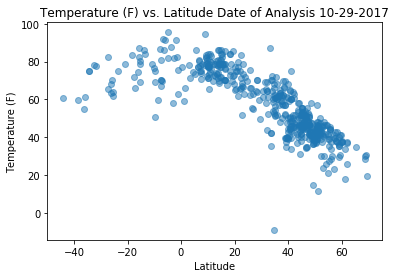

In [34]:
plt.scatter(selected_cities["Latitude"],selected_cities["Temperature"], alpha = 0.5)

plt.title("Temperature (F) vs. Latitude Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

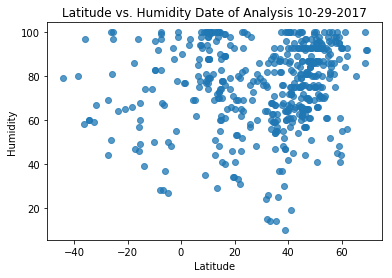

In [29]:
plt.scatter(selected_cities["Latitude"],selected_cities["Humidity"], alpha = 0.75)

plt.title("Latitude vs. Humidity Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

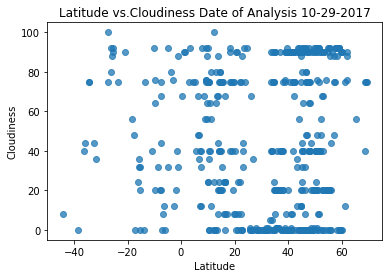

In [28]:
plt.scatter(selected_cities["Latitude"],selected_cities["Cloudiness"], alpha = 0.75)

plt.title("Latitude vs.Cloudiness Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.show()

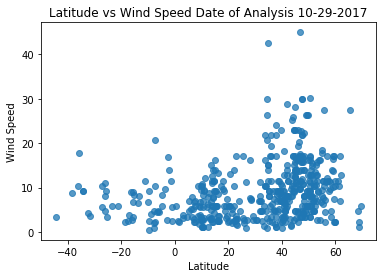

In [27]:
plt.scatter(selected_cities["Latitude"],selected_cities["Wind Speed"], alpha= 0.75)
plt.title("Latitude vs Wind Speed Date of Analysis 10-29-2017")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind Speed.png")
plt.show()

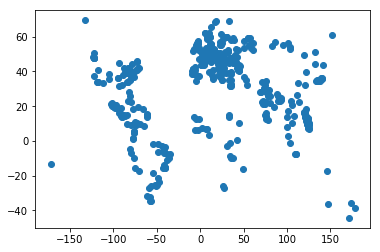

In [17]:
plt.scatter(selected_cities["Longitude"],selected_cities["Latitude"])
plt.title("Longitude vs Latitude")
plt.show()